In [1]:
%pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install numpy==1.22.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='russian')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:

stop_words = nltk.corpus.stopwords.words('russian')
def preprocess(doc):
    # к нижнему регистру
    doc = doc.lower()
    # убираем пунктуацию, пробелы, прочее
    for p in string.punctuation + string.whitespace + 'http': 
        doc = doc.replace(p, ' ')
    # убираем кавычки
    for p in ['«', '»', '\'', '\"']:
        doc = doc.replace(p, ' ')
    for p in stop_words:
        doc = doc.replace(' ' + p + ' ', ' ')
    # убираем лишние пробелы, объединяем обратно
    words = doc.split()

# Стемминг каждого слова и добавление его в список
    stemmed_words = []
    for word in words:
      stemmed_words.append(stemmer.stem(word))
      stemmed_sentence = " ".join(stemmed_words)
    
    
    return stemmed_sentence

In [5]:
df = pd.read_csv('/content/drive/MyDrive/NLP/news.csv')
df = df[df['rubric'].notna()]

In [6]:
preprocess('Я шла по дому и нашел еду')

'я шла дом нашел ед'

In [7]:
df['rubric'].value_counts()

Россия               908
Мир                  718
Спорт                494
Экономика            420
Бывший СССР          394
Силовые структуры    220
Интернет и СМИ       211
Наука и техника      208
Культура             206
Из жизни             197
Путешествия          183
Ценности             141
Дом                  123
Нацпроекты            53
69-я параллель        27
Name: rubric, dtype: int64

In [8]:
#Убираю колонки до 12 штук (в yellowbrick 12 цветов параметр 'paired')
df = df.loc[df['rubric'] != '69-я параллель']
df = df.loc[df['rubric'] != 'Нацпроекты']
df = df.loc[df['rubric'] != 'Дом']

In [9]:
df['text'] = df['text'].map(preprocess)

docs = list(df['text'].values)

In [10]:
rubrics = list(df['rubric'].values)

In [11]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF
import umap.umap_ as umap


nltk.download('punkt') 
# Создание TF-IDF матрицы

vectorizer = CountVectorizer(stop_words=stop_words)
word_doc_matrix = vectorizer.fit_transform(docs)
# Уменьшение размерности с помощью PCA, TruncatedSVD, NMF и UMAP



pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=2)
nmf = NMF(n_components=2)

umap_reducer = umap.UMAP(n_components=2)
pca_results = pca.fit_transform(word_doc_matrix.toarray())
svd_results = svd.fit_transform(word_doc_matrix)
nmf_results = nmf.fit_transform(word_doc_matrix)
umap_results = umap_reducer.fit_transform(word_doc_matrix)

#Строим графики
fig = px.scatter(x=pca_results[:,0], y=pca_results[:,1])
fig.update_layout(title="PCA Dimensionality Reduction")
fig.show()



fig = px.scatter(x=svd_results[:,0], y=svd_results[:,1])
fig.update_layout(title="SVD Dimensionality Reduction")
fig.show()


fig = px.scatter(x=nmf_results[:,0], y=nmf_results[:,1])
fig.update_layout(title="NMF Dimensionality Reduction")
fig.show()


fig = px.scatter(x=umap_results[:,0], y=umap_results[:,1])
fig.update_layout(title="UMAP Dimensionality Reduction")
fig.show()



# Теперь трехмерный
pca = PCA(n_components = 3)
svd = TruncatedSVD(n_components=3)
nmf = NMF(n_components=3)

pca_results = pca.fit_transform(word_doc_matrix.toarray())
svd_results = svd.fit_transform(word_doc_matrix)
nmf_results = nmf.fit_transform(word_doc_matrix)
umap_results = umap.UMAP(n_components=3, metric='cosine').fit_transform(word_doc_matrix)

# Построение графика 

fig = px.scatter_3d(
    title="PCA",
    x=pca_results[:, 0], 
    y=pca_results[:, 1], 
    z=pca_results[:, 2]
)

fig.show()

fig = px.scatter_3d(
    title="TruncatedSVD",
    x=svd_results[:, 0], 
    y=svd_results[:, 1], 
    z=svd_results[:, 2]
)

fig.show()

fig = px.scatter_3d(
    title="NMF",
    x=nmf_results[:, 0], 
    y=nmf_results[:, 1], 
    z=nmf_results[:, 2]
)

fig.show()

fig = px.scatter_3d(
    title="UMAP",
    x=umap_results[:, 0], 
    y=umap_results[:, 1], 
    z=umap_results[:, 2]
)

fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



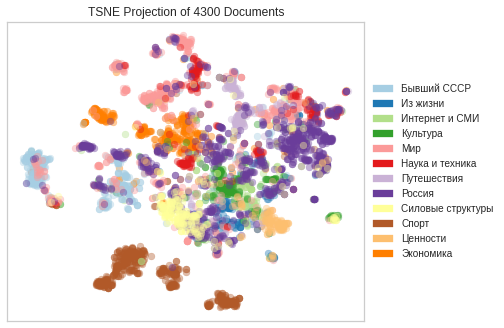

<AxesSubplot:title={'center':'TSNE Projection of 4300 Documents'}>

In [12]:
from yellowbrick.style import set_palette
set_palette('paired')
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(docs)
y = rubrics


tsne = TSNEVisualizer(metric='cosine',alpha = 0.4)
tsne.fit(X, y)
tsne.show()

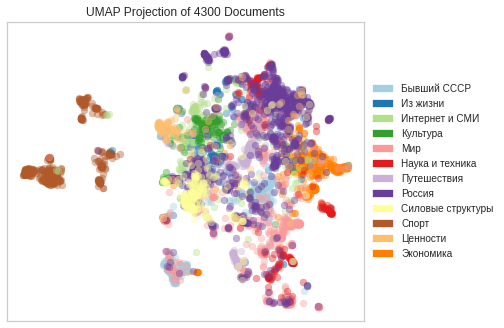

<AxesSubplot:title={'center':'UMAP Projection of 4300 Documents'}>

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from yellowbrick.text import UMAPVisualizer




tfidf = TfidfVectorizer()
docs1 = tfidf.fit_transform(docs)
labels = rubrics


umap = UMAPVisualizer(metric='cosine',alpha = 0.4)
umap.fit(docs1, labels)
umap.show()

UMAP считается дольше чем остальные методы, но по графикам можно заметить, что кластеризует и визуализирует он лучше.


# Задание 2


In [14]:
!pip install bigartm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00


In [15]:
import artm

# Готовим данные
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

num_topics = 50
cv = CountVectorizer(max_features=1000, stop_words=stop_words)

In [16]:
ts = cv.fit_transform(df['text'].values)
n_wd = np.array(ts.todense()).T

In [17]:
vocabulary = cv.get_feature_names_out()

In [18]:
bv = artm.BatchVectorizer(data_format='bow_n_wd',
                          n_wd=n_wd,
                          vocabulary=vocabulary)

In [19]:
dictionary = bv.dictionary


In [20]:
topic_names = ['topic_{}'.format(i) for i in range(num_topics)]
model = artm.ARTM(num_topics=num_topics, dictionary=bv.dictionary, cache_theta=True,
                  topic_names=topic_names, scores=[artm.PerplexityScore(name='PerplexityScore', dictionary=dictionary)],
                  regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.2)],show_progress_bars = 1)
model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))
model.fit_offline(bv, num_collection_passes=20)
for topic_name in model.topic_names:
    print(topic_name + ': ', model.score_tracker['TopTokensScore'].last_tokens[topic_name])
print(model.get_score('PerplexityScore'))

Pass: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


topic_0:  ['тысяч', 'человек', 'коронавирус', 'числ', 'дан', 'стран']
topic_1:  ['источник', 'ссылк', 'дан', 'сообща', 'петербург', 'информац']
topic_2:  ['сотрудник', 'полиц', 'полицейск', 'инцидент', 'котор', 'произошел']
topic_3:  ['войн', 'год', 'советск', 'миров', 'бел', 'великобритан']
topic_4:  ['пандем', 'коронавирус', 'экономик', 'стран', 'мер', 'экономическ']
topic_5:  ['договор', 'услов', 'компан', 'le', 'контракт', 'соглашен']
topic_6:  ['воен', 'турц', 'сил', 'турецк', 'арм', 'сирийск']
topic_7:  ['самолет', 'пассажир', 'аэропорт', 'маск', 'борт', 'корабл']
topic_8:  ['росс', 'российск', 'стран', 'представител', 'москв', 'заяв']
topic_9:  ['ира', 'январ', 'ал', 'сша', 'израил', 'генера']
topic_10:  ['суд', 'год', 'дел', 'бывш', 'обвинен', 'документ']
topic_11:  ['президент', 'путин', 'владимир', 'росс', 'глав', 'государств']
topic_12:  ['дел', 'уголовн', 'стат', 'управлен', 'нарушен', 'следствен']
topic_13:  ['миллиард', 'миллион', 'доллар', 'банк', 'рубл', 'средств']
topi

In [21]:
topic_names = ['topic_{}'.format(i) for i in range(num_topics)]
model = artm.ARTM(num_topics=num_topics, dictionary=bv.dictionary, cache_theta=True,
                  topic_names=topic_names, scores=[artm.PerplexityScore(name='PerplexityScore', dictionary=dictionary)],
                  regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=0.8)])
model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))
model.fit_offline(bv, num_collection_passes=20)
for topic_name in model.topic_names:
    print(topic_name + ': ', model.score_tracker['TopTokensScore'].last_tokens[topic_name])
print(model.get_score('PerplexityScore'))

topic_0:  ['тысяч', 'окол', 'человек', 'петербург', 'санкт', 'аппарат']
topic_1:  ['сотрудник', 'полиц', 'полицейск', 'инцидент', 'улиц', 'орган']
topic_2:  ['котор', 'программ', 'исследован', 'школ', 'животн', 'шо']
topic_3:  ['втор', 'войн', 'год', 'стран', 'великобритан', 'миров']
topic_4:  ['стран', 'пандем', 'нов', 'мер', 'количеств', 'месяц']
topic_5:  ['средств', 'якоб', 'котор', 'говор', 'деньг', 'имеет']
topic_6:  ['воен', 'сил', 'турц', 'турецк', 'арм', 'вооружен']
topic_7:  ['самолет', 'международн', 'пассажир', 'аэропорт', 'борт', 'корабл']
topic_8:  ['росс', 'российск', 'стран', 'мид', 'крым', 'территор']
topic_9:  ['сша', 'американск', 'трамп', 'дональд', 'штат', 'ира']
topic_10:  ['год', 'суд', '2019', 'обвинен', 'лет', 'бывш']
topic_11:  ['возможн', 'должн', 'эт', 'вопрос', 'будут', 'наш']
topic_12:  ['дел', 'уголовн', 'стат', 'управлен', 'комитет', 'нарушен']
topic_13:  ['миллион', 'год', 'банк', 'поддержк', 'сумм', 'европейск']
topic_14:  ['однак', 'сво', 'нача', 'июл

In [24]:
topic_names = ['topic_{}'.format(i) for i in range(num_topics)]
model = artm.ARTM(num_topics=num_topics, dictionary=bv.dictionary, cache_theta=True,
                  topic_names=topic_names, scores=[artm.PerplexityScore(name='PerplexityScore', dictionary=dictionary)],
                  regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.5),artm.SmoothSparsePhiRegularizer(tau = -0.9)])
model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))
model.fit_offline(bv, num_collection_passes=20)
for topic_name in model.topic_names:
    print(topic_name + ': ', model.score_tracker['TopTokensScore'].last_tokens[topic_name])
print(model.get_score('PerplexityScore'))

topic_0:  ['тысяч', 'коронавирус', 'человек', 'заражен', 'дан', 'числ']
topic_1:  ['источник', 'дан', 'ссылк', 'петербург', 'автомобил', 'санкт']
topic_2:  ['сотрудник', 'полиц', 'полицейск', 'инцидент', 'мвд', 'котор']
topic_3:  ['войн', 'год', 'великобритан', 'миров', 'бел', 'втор']
topic_4:  ['пандем', 'коронавирус', 'экономик', 'стран', 'мер', 'врем']
topic_5:  ['сообща', 'котор', 'услов', 'договор', 'должн', 'le']
topic_6:  ['воен', 'турц', 'турецк', 'арм', 'сил', 'сирийск']
topic_7:  ['самолет', 'пассажир', 'аэропорт', 'борт', 'рейс', 'корабл']
topic_8:  ['росс', 'российск', 'стран', 'представител', 'москв', 'крым']
topic_9:  ['украин', 'украинск', 'зеленск', 'президент', 'ира', 'стран']
topic_10:  ['суд', 'год', 'дел', 'бывш', 'обвинен', 'адвокат']
topic_11:  ['росс', 'путин', 'президент', 'владимир', 'российск', 'глав']
topic_12:  ['дел', 'уголовн', 'стат', 'нарушен', 'рф', 'комитет']
topic_13:  ['доллар', 'миллиард', 'миллион', 'рубл', 'банк', 'сумм']
topic_14:  ['побед', 'вст

Ссылка для визуализации сломана на сайте документации. Как я понял чем меньше перплексия тем модель лучше.При tau=-0.2 она получилась наименьшей в результате этих экспериментов. Топики получились довольно содержательные во всех случаях. 
